# Pandas Lecture


## 1. Pandas Introduction
Pandas is a Python library useful for handling and analyzing data structures, particularly bidimensional tables and time series. It provides useful data structures like **Series** and **DataFrames**.

In [1]:
import pandas as pd

## 2. Pandas Series
A `Series` is a 1-dimensional sequence of homogeneous elements (i.e., all with the same type) associated
with an explicit index. Index elements can be either strings or integers. The main difference with respect
to a `1-dimensional array` is that each element is associated with an `index`. You can use the index to access
the associated array element. The `index` can be `numerical or textual` (e.g., timestamp, date, etc.).

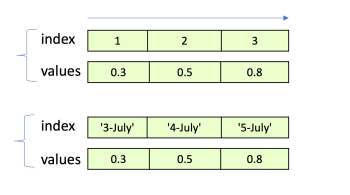

### 2.1 Pandas Series Creation

There are many ways to create a Series. You should specify the values and the index of the series. If the index is not specified, it is set automatically with a progressive number.

#### 2.1.1 Series from List

You can create a Series directly from a Python list. If you do not specify the index, it will automatically
create a progressive number starting from 0:

In [2]:
s1 = pd.Series([2.0, 3.1, 4.5])
print(s1)

0    2.0
1    3.1
2    4.5
dtype: float64


If you want, you can specify the index by passing a list to the index parameter:

In [3]:
s1 = pd.Series([2.0 , 3.1 , 4.5] , index =[ 'a','b','c'])
print(s1)

a    2.0
b    3.1
c    4.5
dtype: float64


#### 2.1.2 Series from Dictionary

You can create a Series also from a Python dictionary. In this case, the keys of the dictionary define the index of the Series, while the values of the dictionary define the values of the Series. The order of the elements in the dictionary is preserved when creating the series (i.e., the first key of the dictionary is the first index in the Series).

In [4]:
s1 = pd.Series({'a': 2.0, 'b': 3.1, 'c': 4.5})
print(s1)

a    2.0
b    3.1
c    4.5
dtype: float64


### 2.2 Accessing Series Elements

You can access elements of a series by specifying the following:



*   Explicit index: using the explicit index specified while creating the series (with the `Series.loc[]` attribute).
*   Implicit index: using the position (i.e., the number) associated with the element order (similarly to Numpy arrays) (with the `Series.iloc[]` attribute).



#### 2.2.1 Accessing by Explicit Index

To access an element of the Series by specifying the explicit index, you can use the `loc[]` method of the
series and specify the index inside the square brackets (`s1.loc[index]`).

In [5]:
s1 = pd.Series([2.0, 3.1, 4.5], index=['a', 'b', 'c'])
el = s1.loc['b']
print(el)

3.1


#### 2.2.2 Accessing Series elements by position (implicit index)

To access an element of the Series by specifying the position (implicit index), you can use the `iloc[]`
method of the series and specify the position inside the square brackets (`s1.iloc[position]`).

In [6]:
s1 = pd.Series([2.0 , 3.1 , 4.5] , index =[ 'a','b','c'])
el = s1.iloc[1]
print(el)

3.1


#### 2.2.3 Accessing All Values and Index

You can obtain the values and the index of a Series with the `values` and `index` attributes of the Series
object. Notice that the values are a Numpy array. Instead, the Index is a custom Python object defined
in Pandas that allows you to perform more complex operations (e.g., union, intersection, etc. of series).

In [7]:
s1 = pd.Series([2.0 , 3.1 , 4.5] , index =[ 'a','b','c'])

In [8]:
print(s1.values)
print(s1.index)

[2.  3.1 4.5]
Index(['a', 'b', 'c'], dtype='object')


#### 2.2.4 Assigning Values to Elements

You can also use `.loc[]` and `.iloc[]` to assign values to elements and modify the Series inplace:

In [9]:
s1 = pd.Series ([2.0 , 3.1 , 4.5] , index =[ 'a', 'b', 'c'])
print(s1.loc['a']) # With explicit index
print(s1.iloc[0]) # With implicit index
s1.loc ['b'] = 10 # Allows editing values ( assign a value )
print (f" Series :\n{s1}")

2.0
2.0
 Series :
a     2.0
b    10.0
c     4.5
dtype: float64


#### 2.2.5 Slicing a Series

You can also use `.loc[]` and `.iloc[]` to access a slice of the elements of the Series. With the implicit
index (iloc), it works as Numpy arrays and lists. You have to specify the start position (included) and
the end position (excluded). Instead with explicit index (loc), you should specify the starting and stop
index, both included. After slicing, you get a new Series containing the sliced elements.

In [10]:
s1 = pd.Series([2.0 , 3.1 , 4.5 , 1.1 , 7.7 , 2.4] , index =[ 'a', 'b', 'c', 'd', 'e', 'f'])
print(s1.loc['c':'e'])
print(s1.iloc[2:5])

c    4.5
d    1.1
e    7.7
dtype: float64
c    4.5
d    1.1
e    7.7
dtype: float64


#### 2.2.6 Masking a Series

You can also access Series elements with `masking`. The `masking` will create a `boolean Series` with `True` if the condition is satisfied and `False` if not satisfied. When using masking, you can avoid using the loc
function

In [11]:
s1 = pd.Series([2.0 , 3.1 , 4.5] , index =[ 'a', 'b', 'c'])
mask = (s1 > 2) & (s1 < 10)
print(mask)

a    False
b     True
c     True
dtype: bool


As for Numpy, you can exploit the mask to access the Series elemnts and/or modifying if they satisfy
a condition:


In [12]:
s1 = pd.Series([2.0 , 3.1 , 4.5] , index =[ 'a', 'b', 'c'])
mask = (s1 > 2) & (s1 < 10)
print(s1[mask])

b    3.1
c    4.5
dtype: float64


This example shows how to modify Series elements with a mask:

In [13]:
s1 = pd.Series([2.0 , 3.1 , 4.5] , index =[ 'a', 'b', 'c'])
mask = (s1 >2) & (s1 <10)
s1[mask]=0 # modify elements of s1 where mask is True
print(s1)


a    2.0
b    0.0
c    0.0
dtype: float64


#### 2.2.7 Accessing a Series with Fancy Indexing

Fancy Indexing allows you to access a subset of a Series by specifying the list of indices (e.g., you want to access rows with indices 'a' and 'b'). It is an access method also available for Numpy arrays (but we didn't cover it). However, with Series and DataFrame (we will see it later), it is really useful. The syntax is simple:
when you access the series, you have to put inside the square brackets a list of index values that you want to access (e.g., `s1.loc[[’a’, ’b’]]` or `s1.iloc[[1, 3]]`).


This example shows how to access the elements of the Series with (explicit) index ’a’ and ’c’:


In [14]:
s1 = pd.Series ([2.0 , 3.1 , 4.5] , index =[ 'a', 'b', 'c'])
print(s1.loc[['a','c']])

a    2.0
c    4.5
dtype: float64


This example shows how to access with (implicit) index the first (position 0) and the third (position 2) elements of the Series:

In [15]:
print(s1.iloc[[0 , 2]])

a    2.0
c    4.5
dtype: float64


### 3. Pandas DataFrame

DataFrame represents a 2-dimensional array (i.e., a Table). It can be viewed as a table where columns
are Series objects that share the same index. Each column has a name.

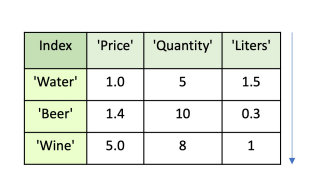

### 3.1 Pandas DataFrame creation
#### 3.1.1 DataFrame from Series

You can create a DataFrame starting from existing Series with the same Index for all of them. You should
use the pd.DataFrame() constructor by passing as a parameter a dictionary with the column names as
keys, and the Series as values:


In [16]:
price = pd.Series([1.0, 1.4, 5], index=['a', 'b', 'c'])
quantity = pd.Series([5, 10, 8], index=['a', 'b', 'c'])
df = pd.DataFrame({'Price': price, 'Quantity': quantity})
print(df)

   Price  Quantity
a    1.0         5
b    1.4        10
c    5.0         8


If you have Series that don’t contain exactly the same Index, the values of the index that do not match
will be inserted only for the Series that contain those values, and for the other Series (i.e., columns), will be
inserted a Null value (i.e., NaN).

In [17]:
price = pd.Series ([1.0 , 1.4 , 5, 2] , index =[ 'a', 'b', 'c', 'd'])# Added 'd' in the Index
quantity = pd.Series ([5 , 10 , 8] , index =[ 'a', 'b', 'c'])
liters = pd.Series ([1.5 , 0.3 , 1] , index =[ 'a', 'b', 'c'])
df = pd.DataFrame ({ 'Price ': price , 'Quantity ': quantity , 'Liters ': liters })
print( df )

   Price   Quantity   Liters 
a     1.0        5.0      1.5
b     1.4       10.0      0.3
c     5.0        8.0      1.0
d     2.0        NaN      NaN


#### 3.1.2 DataFrame from list of dictionaries

You can create a DataFrame from a list of dictionaries. Each dictionary in the list represents a row in the DataFrame. The Index is automatically set to a progressive number (unless explicitly passed as a parameter, e.g., index=[’p1’, ’p2’, ’p3’]).


In [18]:
df = pd.DataFrame (
    [
        {'a':1 , 'b':0.5 , 'c': 2.2} ,
         {'a':1.1 , 'b':0.7 , 'c': 1.8} ,
          {'a':1.5 , 'b':0.2 , 'c': 2.5}
        ]
    )
print(df)

     a    b    c
0  1.0  0.5  2.2
1  1.1  0.7  1.8
2  1.5  0.2  2.5


If you specify the Index parameter

In [19]:
df = pd.DataFrame (
    [
        {'a':1 , 'b':0.5 , 'c': 2.2} ,
         {'a':1.1 , 'b':0.7 , 'c': 1.8} ,
          {'a':1.5 , 'b':0.2 , 'c': 2.5}
        ],
    index = ['p1', 'p2','p3']
    )
print(df)

      a    b    c
p1  1.0  0.5  2.2
p2  1.1  0.7  1.8
p3  1.5  0.2  2.5


#### 3.1.3 DataFrame from a dictionary of key-list pairs

You can create a DataFrame from a dictionary of key-list pairs. In this case, each value of the dictionary
is a list, and it is associated to a column. The column name is given by the corresponding key in the
dictionary. The Index of the DataFrame is automatically set to a progressive number unless explicitly
passed as a parameter, e.g., index=[’p1’, ’p2’, ’p3’]).

In [20]:
my_dict = { "c1": [0 , 1 , 2] , "c2": [0 , 2, 4] }
df = pd.DataFrame(my_dict)
print(df)

   c1  c2
0   0   0
1   1   2
2   2   4


### 3.2 Accessing DataFrames

#### 3.2.1 Accessing Column Names and Index
You can retrieve all column names and index values of a DataFrame using `.columns` and `.index` attributes. The `.columns` attribute returns an Index object containing column names, while `.index` returns row indices.

In [21]:
import pandas as pd

price = pd.Series([1.0, 1.4, 5], index=['a', 'b', 'c'])
quantity = pd.Series([5, 10, 8], index=['a', 'b', 'c'])
liters = pd.Series([1.5, 0.3, 1], index=['a', 'b', 'c'])
df = pd.DataFrame({'Price': price, 'Quantity': quantity, 'Liters': liters})
print(df.columns)  # Get column names
print(df.index)  # Get index

Index(['Price', 'Quantity', 'Liters'], dtype='object')
Index(['a', 'b', 'c'], dtype='object')


#### 3.2.2 Accessing DataFrame Data as Numpy Array
You can convert a DataFrame to a NumPy array using the `.values` attribute. This allows for faster numerical operations.

In [22]:
my_arr = df.values  # Convert DataFrame to Numpy array
print(my_arr)

[[ 1.   5.   1.5]
 [ 1.4 10.   0.3]
 [ 5.   8.   1. ]]


#### 3.2.3 Accessing DataFrame Columns
You can access a DataFrame column using bracket notation `df['column_name']`. It returns a Pandas Series representing the column.

In [23]:
print(df['Quantity'])  # Access a single column

a     5
b    10
c     8
Name: Quantity, dtype: int64


#### 3.2.4 Accessing a Single DataFrame Row by Index
To access a row by its explicit index, use `.loc[row_label]`. To access a row using its position, use `.iloc[row_position]`. Both return a Series representing the row.

In [24]:
print(df.loc['a'])  # Access row using explicit index
print(df.iloc[0])  # Access row using implicit index

Price       1.0
Quantity    5.0
Liters      1.5
Name: a, dtype: float64
Price       1.0
Quantity    5.0
Liters      1.5
Name: a, dtype: float64


#### 3.2.5 Accessing DataFrames with Slicing
You can slice a DataFrame to access specific rows and columns. With `.loc`, both start and end indices are included, while `.iloc` excludes the end index.

In [25]:
print(df.loc['b':'c', 'Quantity':'Liters'])  # Slicing rows and columns using explicit index

   Quantity  Liters
b        10     0.3
c         8     1.0


#### 3.2.6 Accessing DataFrames with Masking
Masking allows filtering rows based on conditions. A boolean mask is applied to select specific data.

In [26]:
mask = (df['Quantity'] < 10) & (df['Liters'] > 1)
print(df.loc[mask, 'Quantity':])  # Apply mask and slice

   Quantity  Liters
a         5     1.5


#### 3.2.7 Accessing DataFrame with Fancy Indexing
Fancy indexing allows selecting multiple specific rows or columns by passing a list of index names.

In [27]:
print(df.loc[['a', 'c'], ['Price', 'Liters']])  # Fancy indexing to access specific rows and columns

   Price  Liters
a    1.0     1.5
c    5.0     1.0


#### 3.2.8 Adding a New Column to DataFrame
You can add a new column by assigning a new Series or list to `df['new_column']`.

In [28]:
df['NewColumn'] = [10, 20, 30]  # Adding a new column
print(df)

   Price  Quantity  Liters  NewColumn
a    1.0         5     1.5         10
b    1.4        10     0.3         20
c    5.0         8     1.0         30


#### 3.2.9 Dropping Columns from DataFrame
To remove columns, use `.drop(columns=['column_name'])`. By default, it returns a new DataFrame unless `inplace=True` is used.

In [29]:
df = df.drop(columns=['NewColumn'])  # Drop a column
print(df)

   Price  Quantity  Liters
a    1.0         5     1.5
b    1.4        10     0.3
c    5.0         8     1.0


#### 3.2.10 Renaming Columns of a DataFrame
You can rename DataFrame columns using `.rename(columns={'old_name': 'new_name'})`. If `inplace=True` is specified, it modifies the DataFrame directly.

In [30]:
df = df.rename(columns={'Price': 'Cost', 'Quantity': 'Amount'})  # Rename columns
print(df)

   Cost  Amount  Liters
a   1.0       5     1.5
b   1.4      10     0.3
c   5.0       8     1.0


### 4 Computation with Pandas



#### 4.1 Unary operations on Series and DataFrames

The unary operations on Series and DataFrames work with any Numpy unary function. The specified
operation is applied to each element of the Series/DataFrame. Also, broadcasting works in the same way.
You can sum/divide/multiply each element of a Series or a DataFrame by a scalar with the +, /, or *
operators. Or you can compute the absolute value, the exponent, etc., of each element of a Series or a
DataFrame with the corresponding Numpy functions `np.abs(s1)`, `np.abs(df)`, `np.exp(s1)`, `np.exp(df)`,
etc.

#### 4.2 Operations between Series and DataFrames
You can apply operations between two series. The operation is applied element-wise after aligning indices. The Index elements which do not match are set to NaN (i.e., not a number). After the alignment, the index in the result is sorted (only if they do not match).


In [31]:
s1 = pd.Series([3 , 1, 10] , index =[ 'b', 'a', 'c'])
s2 = pd.Series ([1 , 3, 30] , index =[ 'a', 'b', 'd'])

res = s1 + s2
print(res)

a    2.0
b    6.0
c    NaN
d    NaN
dtype: float64


For the Index values with no match in both series, it puts the NaN values. Moreover, in this case, the
index and the columns are ordered (only if they do not match).

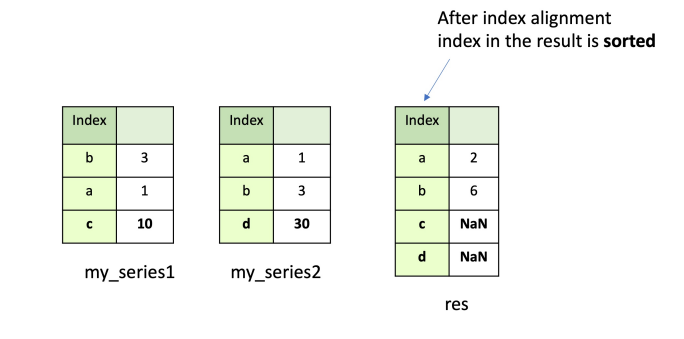

To perform operations with two DataFrames, you not only have to align Index but also the columns.
Therefore, the operation is applied element-wise after aligning indices and columns.


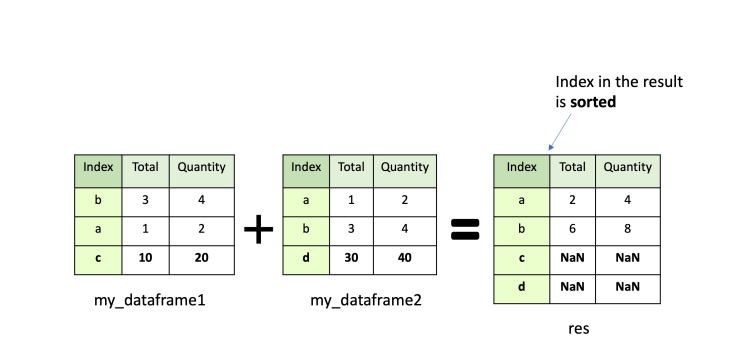

If the columns are not aligned, it inserts NaN values in all the rows of the not aligned columns


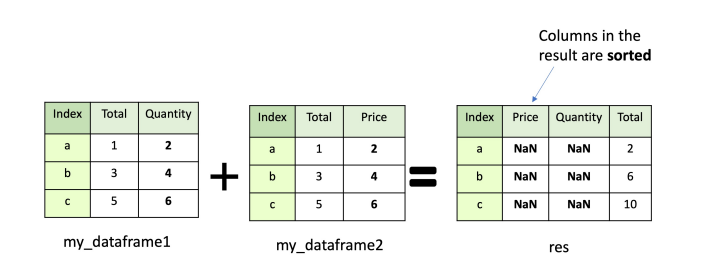

You can also apply operations between DataFrames and Series. The operation is applied between the
Series and each row of the DataFrame. The operation follows the broadcasting rules. You have to
consider the Series as a row vector where each column became an index

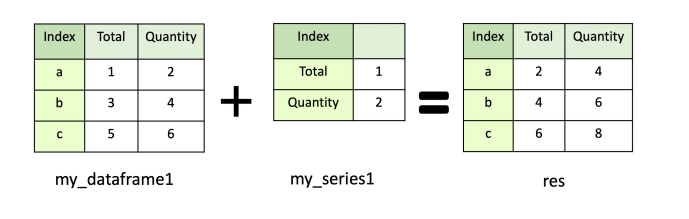

### 4.3 Aggregations

You can perform aggregate functions (for both Series and DataFrames) to compute the mean `df.mean()`, the standard deviation `df.std()`, the minimum value `df.min()`, the maximum value `df.max()`, and the sum `df.sum()`.
An aggregate function applied to a Series returns a single value with the mean/sum/etc. of the series
elements.

In [32]:
s1 = pd.Series([2.0 , 3.1 , 4.5])
print(s1.mean())

3.1999999999999997


Instead, for DataFrames, aggregate functions are applied column-wise and return a Series with the mean/sum/etc. of each column separately

In [33]:
price = pd.Series([1.0 , 1.4 , 5] , index =[ 'a', 'b', 'c'])
quantity = pd.Series([5, 10, 8], index=['a', 'b', 'c'])
liters = pd.Series([1.5, 0.3, 1], index=['a', 'b', 'c'])

df = pd.DataFrame({'Price': price, 'Quantity': quantity, 'Liters': liters})

print(df.mean())

Price       2.466667
Quantity    7.666667
Liters      0.933333
dtype: float64


If you want to perform the Z-Score normalization with pandas of each column separately, you can do
the following:

In [34]:
mean_series = df.mean()
std_series = df.std()

df_norm = (df - mean_series) / std_series
print(df_norm)

      Price  Quantity    Liters
a -0.665750 -1.059626  0.940102
b -0.484182  0.927173 -1.050702
c  1.149932  0.132453  0.110600


### 5 Handling missing values

Missing values in Pandas are represented with sentinel values. They can be represented with the Python
null value `None` or the Numpy not a number `np.Nan`. The difference is that None is a python object, instead
np.Nan is a floating point number. Using NaN achieves better performances when performing numerical
computations. Pandas supports both types and automatically converts between them when appropriate.

#### 5.1 Check if there are Null elements

You can check if a Series or a DataFrame contain null values with the `.isnull()` method (e.g., `s1.isnull()`
or `df.isnull()`). It returns a boolean mask indicating null values (i.e., a boolean mask with True if the
element is Null, False otherwise). The opposite function is `.notnull()`, which returns a boolean mask
indicating not Null values (i.e., True of the element is not Null, False otherwise).


In [35]:
import pandas as pd
import numpy as np

s1 = pd.Series([4, None, 5, np.nan])

print(s1.isnull())  # Returns a boolean mask indicating missing values


0    False
1     True
2    False
3     True
dtype: bool


#### 5.2 Remove Null elements

You can also remove Null elements with the `.dropna()` method.

In [36]:
s1.dropna()

,0
0,4.0
2,5.0


#### 5.3 Fill missing values

You can fill Null values with a specified value with the .`fillna()` method. E.g., `s1.fillna(0)` or `df.fillna(0)`.

In [37]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'Total': [1, 3, 5], 'Quantity': [2, np.nan, 6]}, index=['a', 'b', 'c'])

df_filled = df.fillna(0)  # Fill NaN values with 0
print(df_filled)


   Total  Quantity
a      1       2.0
b      3       0.0
c      5       6.0


### 6 Grouping data inside a DataFrame

Pandas provides the equivalent of the SQL group by statement. It allows iterating on groups, aggregating
the values of each group (e.g., mean, sum, min, max, etc.), and filtering groups according to a condition.
The `.groupby()` method returns a DataFrameGroupBy object. You have to specify the column(s) where
you want to group (key).


In [38]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'k': ['a', 'b', 'a', 'b'], 'c1': [2, 10, 3, 15], 'c2': [4, 20, 5, 30]})

grouped_df = df.groupby('k')  # 2 groups: 'a' and 'b'

for key, group_df in grouped_df:
    print(f"Group: {key}")
    print(group_df)
    print("-" * 20)


Group: a
   k  c1  c2
0  a   2   4
2  a   3   5
--------------------
Group: b
   k  c1  c2
1  b  10  20
3  b  15  30
--------------------


Or you can aggregate by groups (e.g., with min, max, sum, mean, std).

In [39]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'k': ['a', 'b', 'a', 'b'], 'c1': [2, 10, 3, 15], 'c2': [4, 20, 5, 30]})

grouped_df = df.groupby('k')  # 2 groups: 'a' and 'b'

result = grouped_df.mean().reset_index()
print(result)


   k    c1    c2
0  a   2.5   4.5
1  b  12.5  25.0


Notice that you should also use the .reset index() to return a single-level DataFrame. Otherwise, it will return a multi-level DataFrame on the columns.


### 7 Load from a CSV

1.   `.read_csv('filename', sep='seperator')`
2.   `.to_csv('filename', sep='seperator')`



In [41]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')
chipo.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [42]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


Save into csv

In [43]:
chipo.to_csv('chipo.csv',sep='\t')

## References
[1] Wes McKinney. “Data Structures for Statistical Computing in Python”. In: Proceedings of the 9th Python in Science Conference. Ed. by Stéfan van der Walt and Jarrod Millman. 2010, pp. 56–61. [DOI: 10.25080/Majora-92bf1922-00a](https://doi.org/10.25080/Majora-92bf1922-00a)

[2] The pandas development team. pandas-dev/pandas: Pandas. Version latest. Feb. 2020. [DOI: 10.5281/zenodo.3509134](https://doi.org/10.5281/zenodo.3509134)

Data science and Machine Learning for Engineering Applications


[Lecture Notes PDF](https://dbdmg.polito.it/dbdmg_web/wp-content/uploads/2023/03/4-Pandas-lecture-notes.pdf)

[Course Page](https://dbdmg.polito.it/dbdmg_web/2023/data-science-and-machine-learning-for-engineering-applications/)